In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import logistic_regression as logreg
import common as com
%matplotlib inline
import matplotlib.pyplot as plt

In [52]:
dataset = pd.read_csv("pokemon_alopez247.csv", na_values = "?")

In [53]:
print(dataset.sample(5))

     Number        Name    Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
177     178        Xatu   Psychic  Flying    470  65      75       70      95   
519     520   Tranquill    Normal  Flying    358  62      77       62      50   
260     261   Poochyena      Dark     NaN    220  35      55       35      30   
235     236     Tyrogue  Fighting     NaN    210  35      35       35      35   
575     576  Gothitelle   Psychic     NaN    490  70      55       95      95   

     Sp_Def  ...   Color  hasGender  Pr_Male   Egg_Group_1  Egg_Group_2  \
177      70  ...   Green       True     0.50        Flying          NaN   
519      42  ...    Grey       True     0.50        Flying          NaN   
260      30  ...    Grey       True     0.50         Field          NaN   
235      35  ...  Purple       True     1.00  Undiscovered          NaN   
575     110  ...  Purple       True     0.25    Human-Like          NaN   

     hasMegaEvolution Height_m Weight_kg  Catch_Rate        Bo

In [5]:
dataset.dtypes

Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [6]:
dataset.columns

Index(['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color',
       'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [7]:
dataset.count()

Name                721
Type_1              721
Type_2              350
Total               721
HP                  721
Attack              721
Defense             721
Sp_Atk              721
Sp_Def              721
Speed               721
Generation          721
isLegendary         721
Color               721
hasGender           721
Pr_Male             644
Egg_Group_1         721
Egg_Group_2         191
hasMegaEvolution    721
Height_m            721
Weight_kg           721
Catch_Rate          721
Body_Style          721
dtype: int64

In [8]:
dataset.describe

<bound method NDFrame.describe of            Name    Type_1  Type_2  Total   HP  Attack  Defense  Sp_Atk  \
0     Bulbasaur     Grass  Poison    318   45      49       49      65   
1       Ivysaur     Grass  Poison    405   60      62       63      80   
2      Venusaur     Grass  Poison    525   80      82       83     100   
3    Charmander      Fire     NaN    309   39      52       43      60   
4    Charmeleon      Fire     NaN    405   58      64       58      80   
5     Charizard      Fire  Flying    534   78      84       78     109   
6      Squirtle     Water     NaN    314   44      48       65      50   
7     Wartortle     Water     NaN    405   59      63       80      65   
8     Blastoise     Water     NaN    530   79      83      100      85   
9      Caterpie       Bug     NaN    195   45      30       35      20   
10      Metapod       Bug     NaN    205   50      20       55      25   
11   Butterfree       Bug  Flying    395   60      45       50      90   
12  

In [9]:
dataset.corr()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
Total,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,0.481837,-0.385978,0.113564,0.228503,0.526813,0.535966,-0.738280
HP,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,0.258926,-0.155031,-0.066704,0.093708,0.442872,0.431320,-0.478725
Attack,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.302786,-0.196892,0.213882,0.203840,0.408590,0.469395,-0.525106
Defense,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,0.274446,-0.269466,0.063899,0.122666,0.354205,0.476983,-0.436558
Sp_Atk,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,0.409739,-0.336579,0.105893,0.175581,0.330579,0.285048,-0.539114
Sp_Def,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,0.360215,-0.337265,0.017941,0.149796,0.313196,0.328645,-0.513014
Speed,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,0.286082,-0.216964,0.070098,0.147844,0.224617,0.108637,-0.410557
Generation,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,0.071875,-0.029916,0.010912,-0.125374,-0.051304,0.034003,-0.025227
isLegendary,0.481837,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,0.071875,1.000000,-0.644714,0.095428,0.047955,0.326323,0.425219,-0.319302
hasGender,-0.385978,-0.155031,-0.196892,-0.269466,-0.336579,-0.337265,-0.216964,-0.029916,-0.644714,1.000000,NaN,0.016769,-0.200026,-0.361465,0.272304


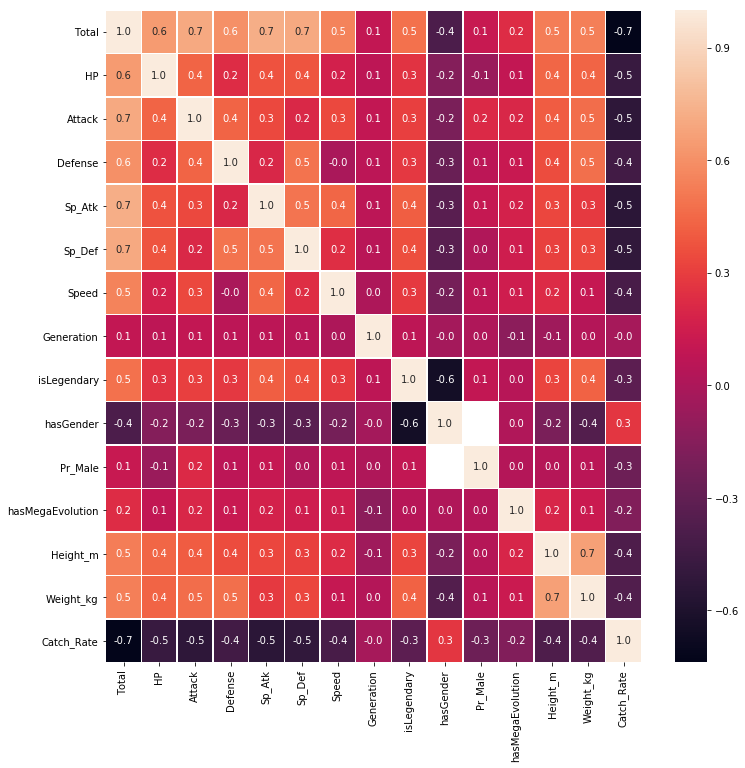

In [10]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [24]:
dataset.Type_1.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [25]:
dataset.Type_2.unique()

array(['Poison', nan, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water', 'Electric', 'Fire',
       'Dragon', 'Dark', 'Ghost', 'Bug', 'Normal'], dtype=object)

Todos os tipos são utilizados tanto como primários como secundários

In [11]:
obj_df = dataset.select_dtypes(include = ['object']).copy()
obj_df.head()

,Name,Type_1,Type_2,Color,Egg_Group_1,Egg_Group_2,Body_Style
0,Bulbasaur,Grass,Poison,Green,Monster,Grass,quadruped
1,Ivysaur,Grass,Poison,Green,Monster,Grass,quadruped
2,Venusaur,Grass,Poison,Green,Monster,Grass,quadruped
3,Charmander,Fire,NaN,Red,Monster,Dragon,bipedal_tailed
4,Charmeleon,Fire,NaN,Red,Monster,Dragon,bipedal_tailed


In [13]:
obj_df[obj_df.isnull().any(axis=1)]

,Name,Type_1,Type_2,Color,Egg_Group_1,Egg_Group_2,Body_Style
3,Charmander,Fire,NaN,Red,Monster,Dragon,bipedal_tailed
4,Charmeleon,Fire,NaN,Red,Monster,Dragon,bipedal_tailed
6,Squirtle,Water,NaN,Blue,Monster,Water_1,bipedal_tailed
7,Wartortle,Water,NaN,Blue,Monster,Water_1,bipedal_tailed
8,Blastoise,Water,NaN,Blue,Monster,Water_1,bipedal_tailed
9,Caterpie,Bug,NaN,Green,Bug,NaN,insectoid
10,Metapod,Bug,NaN,Green,Bug,NaN,serpentine_body
11,Butterfree,Bug,Flying,White,Bug,NaN,four_wings
12,Weedle,Bug,Poison,Brown,Bug,NaN,serpentine_body
13,Kakuna,Bug,Poison,Yellow,Bug,NaN,serpentine_body


In [17]:
pd.get_dummies(obj_df, columns = ["Type_1","Body_Style"]).head()

,Name,Type_2,Color,Egg_Group_1,Egg_Group_2,Type_1_Bug,Type_1_Dark,Type_1_Dragon,Type_1_Electric,Type_1_Fairy,...,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_two_wings,Body_Style_with_fins
0,Bulbasaur,Poison,Green,Monster,Grass,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Ivysaur,Poison,Green,Monster,Grass,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Venusaur,Poison,Green,Monster,Grass,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Charmander,NaN,Red,Monster,Dragon,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Charmeleon,NaN,Red,Monster,Dragon,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data1 = dataset.loc[:,["Number","Total","isLegendary"]]
data1.sample(10)

,Number,Total,isLegendary
57,58,350,False
466,467,540,False
2,3,525,False
248,249,680,True
553,554,315,False
420,421,450,False
81,82,465,False
287,288,440,False
189,190,360,False
536,537,509,False


In [20]:
booleanDictionary = {True: 'Lendario', False: 'Nao Lendario'}
data1 = data1.replace(booleanDictionary)
data1.sample(4)

,isLegendary,Total
128,Nao Lendario,200
506,Nao Lendario,370
419,Nao Lendario,275
584,Nao Lendario,335


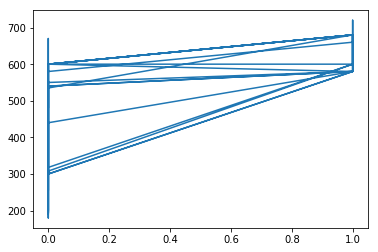

In [55]:
plt.plot(data1.loc[:,'isLegendary'],data1.loc[:,'Total'])

plt.show()

Percebemos uma clara relação entre os status e verificar se um pokémon é ou não lendário, no entanto temos alguns dados que podem nos confundir 

In [76]:
#Divisão entrada e saída 

x = dataset.loc[:,["Number","HP", "Attack", "Defense",
       "Sp_Atk", "Sp_Def", "Speed"]].values

y = dataset.loc[:,"isLegendary"].values

train_ratio = 0.8
validation_ratio = 0.2

print("Número de padrões: %d" % x.shape[0])
print("Número de atributos: %d" % x.shape[1])
print("Número de classes: %d" % np.unique(y).shape[0])

Número de padrões: 721
Número de atributos: 7
Número de classes: 2


In [77]:
#Divisão treino/teste
np.random.seed(12345)

number_train = int(np.ceil(train_ratio*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 578
Número de padrões de teste: 143


In [78]:
#divisão validação e treinamento
number_validation = int(np.ceil(validation_ratio*(x_train.shape[0])))
number_train_validation = x_train.shape[0] - number_validation

random_index = np.random.permutation(x_train.shape[0])
train_index = random_index[:number_train_validation+1]
validation_index = random_index[number_train_validation+1:number_train_validation+number_validation+1]

x_train_validation, x_validation = x_train[train_index], x_train[validation_index]
y_train_validation, y_validation = y_train[train_index], y_train[validation_index]

print("Conjunto de treinamento: %d amostras" % y_train_validation.shape[0])
print("Conjunto de validação: %d amostras" % y_validation.shape[0])

Conjunto de treinamento: 463 amostras
Conjunto de validação: 115 amostras


In [79]:
#one_hot encoding
y_train_encoding = np.zeros((y_train.shape[0], max(y)+1))
for i in range(y_train_encoding.shape[0]):
    y_train_encoding[i,y_train[i]] = 1
y_train_validation_encoding = np.zeros((y_train_validation.shape[0], max(y)+1))
for i in range(y_train_validation_encoding.shape[0]):
    y_train_validation_encoding[i,y_train_validation[i]] = 1
y_validation_encoding = np.zeros((y_validation.shape[0], max(y)+1))
for i in range(y_validation_encoding.shape[0]):
    y_validation_encoding[i,y_validation[i]] = 1
y_test_encoding = np.zeros((y_test.shape[0], max(y)+1))
for i in range(y_test_encoding.shape[0]):
    y_test_encoding[i,y_test[i]] = 1

In [80]:
x_train.shape

(578, 7)

In [81]:
y_train.shape

(578,)

In [82]:
print("[LogisticRegression] Selecionando modelos...")

num_epochs = 2000
grid_search = np.logspace(-3, 0, 25) # alpha
validation_list = []
for i in range(grid_search.shape[0]):
    alpha = grid_search[i]
    
    model_logreg = logreg.gd(x=x_train_validation, y=y_train_validation_encoding,
                              alpha=alpha, num_epochs=num_epochs, compute_loss=False)
    pred = np.argmax(logreg.predict(model_logreg['w'], x_validation), axis=1)
    wrong_index_validation = y_validation != pred
    validation_list.append(np.mean(wrong_index_validation))
   
best_alpha = grid_search[np.argmin(validation_list)] 

print("[LogisticRegression] Melhor modelo encontrado: alpha=%.2e" % (best_alpha))

[LogisticRegression] Selecionando modelos...
[LogisticRegression] Melhor modelo encontrado: alpha=1.00e-03


[LogisticRegression] Treinando modelo...


C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


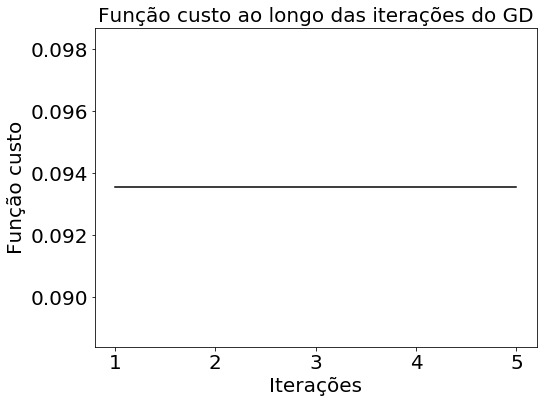

[LogisticRegression] Avaliando modelo...
[LogisticRegression] Taxa de erro no teste: 4.90%


In [83]:
print("[LogisticRegression] Treinando modelo...")
model_logreg = logreg.gd(x=x_train, y=y_train_encoding, alpha=best_alpha, num_epochs=num_epochs, compute_loss=True)

com.plot_loss_path(model_logreg['loss_history'], 'Função custo ao longo das iterações do GD')

print("[LogisticRegression] Avaliando modelo...")
pred_logreg = np.argmax(logreg.predict(model_logreg['w'], x_test), axis=1)

wrong_index_test_logreg = pred_logreg != y_test
print("[LogisticRegression] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_logreg)))